<h1>Lesson 3, Tabular Models</h1>

# Libraries for Today:

In [0]:
#!git clone https://github.com/muellerzr/ML_Useful_Functions.git
from ML_Useful_Functions.Functions import *
plotFunctions()

In [0]:
from fastai import *
from fastai.tabular import *
from ML_Useful_Functions.Functions import *
from ML_Useful_Functions.TabularClassificationInterpretation import *

# Fast.AI *Standard*

Tabular data should be in a Pandas `DataFrame`.

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [0]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']
cont_names = ['age', 'fnlwgt', 'education-num']
procs = [FillMissing, Categorify, Normalize]

In [0]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_idx(list(range(800,1000)))
                           .label_from_df(cols=dep_var)
                           .databunch())

In [5]:
data.show_batch(rows=10)

workclass,education,marital-status,occupation,relationship,race,education-num_na,age,fnlwgt,education-num,target
Self-emp-not-inc,10th,Married-civ-spouse,Farming-fishing,Husband,White,False,-0.1896,0.1657,-1.5958,<50k
Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,False,0.6166,-0.4301,1.1422,>=50k
Private,Masters,Married-civ-spouse,Prof-specialty,Husband,White,False,-0.4095,-0.3179,1.5334,>=50k
Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,False,-0.3362,6.2587,-0.4224,<50k
Private,HS-grad,Married-civ-spouse,Tech-support,Husband,White,False,0.9098,-0.5346,-0.4224,>=50k
Private,Some-college,Never-married,Exec-managerial,Not-in-family,Black,False,0.5434,-1.2632,-0.0312,<50k
Private,Some-college,Never-married,Handlers-cleaners,Own-child,White,False,-1.2891,-0.6734,-0.0312,<50k
Self-emp-not-inc,7th-8th,Married-civ-spouse,Transport-moving,Husband,White,False,1.4229,-0.7976,-2.3781,>=50k
Private,HS-grad,Divorced,Craft-repair,Not-in-family,White,False,-0.1896,-1.1064,-0.4224,<50k
Private,HS-grad,Never-married,Adm-clerical,Not-in-family,White,False,0.4701,1.3351,-0.4224,<50k


In [0]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [6]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=200, out_features=100, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [7]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.recorder.plot??

Min numerical gradient: 1.91E-02
Min loss divided by 10: 2.51E-02


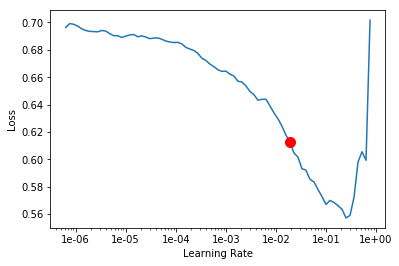

In [8]:
lr = learn.recorder.plot(suggestion=True, return_lr=True)

In [9]:
learn.fit(3, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.358562,0.388192,0.790000,00:05
1,0.379001,0.402665,0.825000,00:04
2,0.360354,0.359505,0.840000,00:04


In [0]:
cls = ClassificationInterpretationTabular.from_learner(learn)

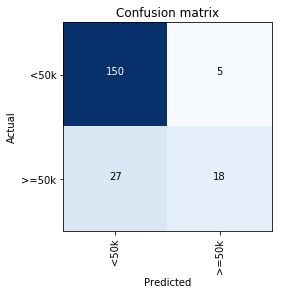

In [13]:
cls.plot_confusion_matrix()

In [14]:
cls.most_confused()

[('>=50k', '<50k', 27), ('<50k', '>=50k', 5)]

In [0]:
k = None

In [23]:
cls.losses.topk(ifnone(k, len(cls.losses)), largest=True)

torch.return_types.topk(...)

In [0]:
def top_losses(self, k:int=None, largest=True):
    "`k` largest(/smallest) losses and indexes, defaulting to all losses (sorted by `largest`)."
    return losses.topk(ifnone(k, len(self.losses)), largest=largest)

In [0]:
interp = learn.interpret()

In [33]:
help(torch.topk)

Help on built-in function topk:

topk(...)
    topk(input, k, dim=None, largest=True, sorted=True, out=None) -> (Tensor, LongTensor)
    
    Returns the :attr:`k` largest elements of the given :attr:`input` tensor along
    a given dimension.
    
    If :attr:`dim` is not given, the last dimension of the `input` is chosen.
    
    If :attr:`largest` is ``False`` then the `k` smallest elements are returned.
    
    A namedtuple of `(values, indices)` is returned, where the `indices` are the indices
    of the elements in the original `input` tensor.
    
    The boolean option :attr:`sorted` if ``True``, will make sure that the returned
    `k` elements are themselves sorted
    
    Args:
        input (Tensor): the input tensor
        k (int): the k in "top-k"
        dim (int, optional): the dimension to sort along
        largest (bool, optional): controls whether to return largest or
               smallest elements
        sorted (bool, optional): controls whether to return t

In [0]:
myvals = interp.top_losses(5, True)

In [117]:
myvals

torch.return_types.topk(values=tensor([3.3187, 2.9598, 2.9355, 2.6213, 2.2764]), indices=tensor([166, 195,  26,  42,  24]))

In [92]:
list(myvals)[1]

tensor([166, 195,  26,  42,  24])

In [119]:
learn.data.valid_ds.idx

AttributeError: ignored

In [0]:
item = learn.data.valid_ds[166]

In [111]:
item[0]

TabularLine workclass  State-gov; education  11th; marital-status  Widowed; occupation  Other-service; relationship  Unmarried; race  White; education-num_na False; age 1.6428; fnlwgt -0.2826; education-num -1.2046; 

In [113]:
test = pd.DataFrame(learn.data.valid_ds[166][0])

ValueError: ignored

In [69]:
learn.data.valid_dl.dl.dataset[166][0]

TabularLine workclass  State-gov; education  11th; marital-status  Widowed; occupation  Other-service; relationship  Unmarried; race  White; education-num_na False; age 1.6428; fnlwgt -0.2826; education-num -1.2046; 

In [0]:
test = data.valid_ds[166]

In [88]:
test

TabularLine workclass  State-gov; education  11th; marital-status  Widowed; occupation  Other-service; relationship  Unmarried; race  White; education-num_na False; age 1.6428; fnlwgt -0.2826; education-num -1.2046; 

In [90]:
df.iloc[166]

age                           60
workclass                Private
fnlwgt                    173960
education              Bachelors
education-num                NaN
marital-status          Divorced
occupation                   NaN
relationship       Not-in-family
race                       White
sex                       Female
capital-gain                   0
capital-loss                   0
hours-per-week                42
native-country     United-States
salary                      <50k
Name: 166, dtype: object

In [87]:
learn.predict(df.iloc[166])

(Category <50k, tensor(0), tensor([0.9045, 0.0955]))

In [85]:
test.cats

array([8, 2, 7, 9, 5, 5, 1])

In [115]:
learn.data.valid_ds[166]

(TabularLine workclass  State-gov; education  11th; marital-status  Widowed; occupation  Other-service; relationship  Unmarried; race  White; education-num_na False; age 1.6428; fnlwgt -0.2826; education-num -1.2046; ,
 Category >=50k)

In [71]:
learn.predict(data.valid_ds[166][0])

KeyError: ignored

In [30]:
interp.most_confused()

[('>=50k', '<50k', 27), ('<50k', '>=50k', 5)]

## Inference

In [0]:
row = df.iloc[0]

In [0]:
learn.predict(row)

(Category <50k, tensor(0), tensor([0.7620, 0.2380]))

# Let's add a few twists

In [0]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

<h2> SplitSet </h2>

In [0]:
SplitSet??

Utilizes the scikit-learn library function, splits a dataframe into 90% train, 10% test dataframes

In [0]:
train, test = SplitSet(df)

Just to verify it did a 90/10 split:

In [0]:
print(f'Train percent: {round(len(train)/len(df)*100, 3)}%')
print(f'Test percent: {round(len(test)/len(df)*100, 3)}%')
print(f'Checking overall percentage: {(len(train)+len(test))/len(df)*100}%')

Train percent: 89.997%
Test percent: 10.003%
Checking overall percentage: 100.0%


In [0]:
data = (TabularList.from_df(train, path=path, cat_names=cat_names, cont_names=cont_names, procs=procs)
                           .split_by_rand_pct()
                           .label_from_df(cols=dep_var)
                           .databunch())

<h2> Proper Layer Size </h2>
Based on formula from here: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw



In [0]:
calcHiddenLayer??

In [0]:
layers = calcHiddenLayer(data, 3); layers

[434, 434]

In [0]:
learn = tabular_learner(data, layers=layers, metrics=accuracy)
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(10, 6)
    (1): Embedding(17, 8)
    (2): Embedding(8, 5)
    (3): Embedding(16, 8)
    (4): Embedding(7, 5)
    (5): Embedding(6, 4)
    (6): Embedding(3, 3)
  )
  (emb_drop): Dropout(p=0.0)
  (bn_cont): BatchNorm1d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=42, out_features=434, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(434, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Linear(in_features=434, out_features=434, bias=True)
    (4): ReLU(inplace)
    (5): BatchNorm1d(434, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Linear(in_features=434, out_features=2, bias=True)
  )
)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 6.92E-02
Min loss divided by 10: 1.00E-02


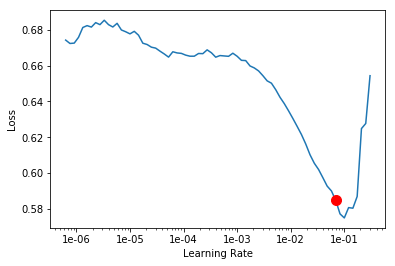

In [0]:
learn.lr_find()
lr = learn.recorder.plot(suggestion = True, return_lr=True)

In [0]:
learn.fit(1, lr)

epoch,train_loss,valid_loss,accuracy,time
0,0.402703,0.363149,0.827986,00:03


<h2> Feature Importance </h2>

<h3> Single Permutation Feature Importance </h3>

Paper: https://academic.oup.com/bioinformatics/article/26/10/1340/193348

In [0]:
feature_importance??

Operates by shuffling one column to break a relationship, and sees how much it impacted the performance. Must be done on an already trained model!

In [0]:
cat_vars, cont_vars = feature_importance(learn); print(f'Categorical: {cat_vars}, \nContinuous: {cont_vars}')

Categorical: ['marital-status', 'occupation', 'education', 'workclass', 'race'], 
Continuous: ['education-num', 'age', 'fnlwgt']


<h2> Getting predictions quickly </h2>
Let's analyze learn.predict() and learn.get_preds()

In [0]:
PredictTest??

In [0]:
%time PredictTest(test, learn, dep_var)

Test accuracy of: 83.03124904632568
CPU times: user 217 ms, sys: 107 ms, total: 324 ms
Wall time: 461 ms


83.03124904632568